#Homework 2: Supervised Learning
##Part A:
###1. Find the url for the California Test Score Data Set from the following website: https://vincentarelbundock.github.io/Rdatasets/datasets.html Links to an external site.. Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data: https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv Links to an external site.. The target data (i.e. the dependent variable) is named "testscr". You can use all variables in the data except for "readscr" and "mathscr" in the following analysis (those two variables were used to generate the dependent variable).

In [ ]:
# Import Python Libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read csv file

df_partA = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv')
df_partA_filtered = df_partA.drop(columns=['readscr', 'mathscr'])
df_partA_filtered.head(5)

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


###2. Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature

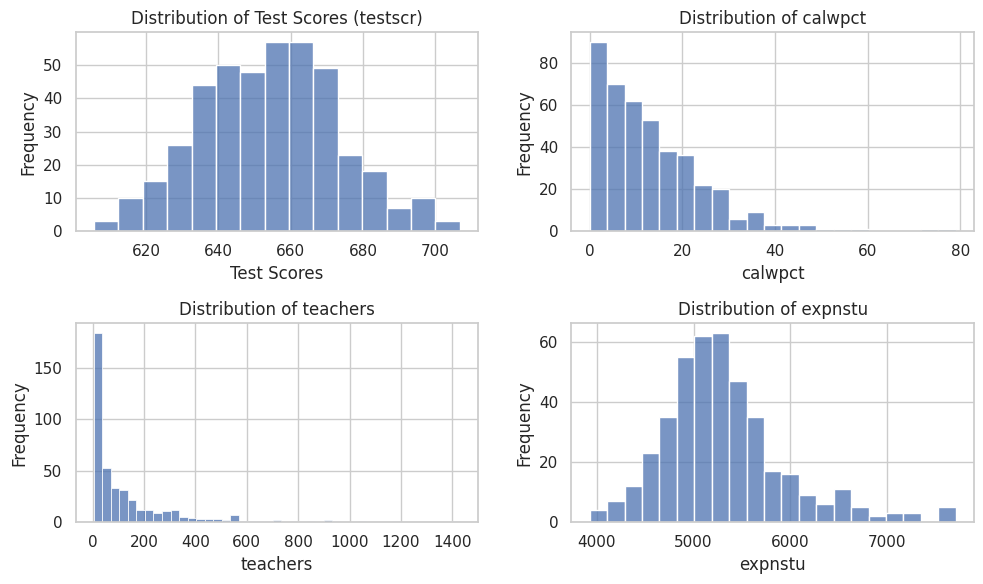

In [ ]:
explanatory_vars = ['calwpct', 'teachers', 'expnstu'] # calwpct=Percent qualifying for CalWorks (income assistance), teachers=number of teacher, expenditure=expenditure per student

plt.figure(figsize=(10, 6))

# Univariate distributions for test score
plt.subplot(2, 2, 1)
sns.histplot(df_partA_filtered['testscr'])
plt.title('Distribution of Test Scores (testscr)')
plt.xlabel('Test Scores')
plt.ylabel('Frequency')

# Univariate distributions for each explanatory variable
for i, var in enumerate(explanatory_vars, start=2):  #start from 1st var
    plt.subplot(2, 2, i)
    sns.histplot(df_partA_filtered[var])
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout() #Prevent Overlap
plt.show()

###3. Visualize the dependency of the target on each feature you just plotted.

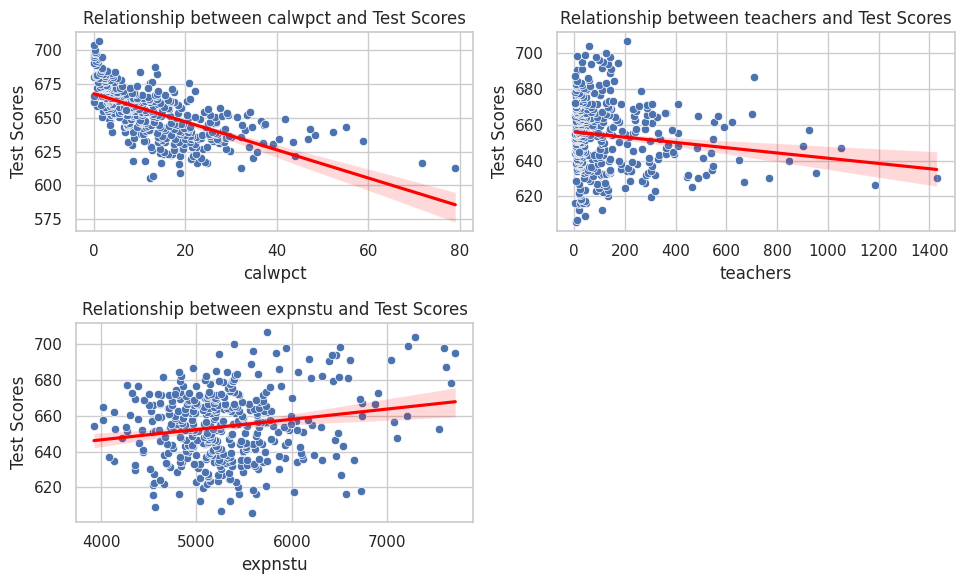

In [ ]:
plt.figure(figsize=(10, 6))

# Create scatter plots for each explanatory variable against the target variable
for i, var in enumerate(explanatory_vars, start=1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_partA_filtered[var], y=df_partA_filtered['testscr'])
    sns.regplot(x=df_partA_filtered[var], y=df_partA_filtered['testscr'], scatter=False, color='red')
    plt.title(f'Relationship between {var} and Test Scores')
    plt.xlabel(var)
    plt.ylabel('Test Scores')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

###4. Split the data into training and test sets. Build models that evaluate the relationship between all available quantitative X variables in the California test dataset and the target variable. Evaluate KNN (for regression), Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. How different are the results?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
import numpy as np
from statistics import mean

X = df_partA_filtered[['calwpct', 'teachers', 'expnstu']]  # Features
y = df_partA_filtered['testscr']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Set up cross-validation strategies
kfold = KFold(n_splits=5)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

# Define models
models = {
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# Evaluate models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold)  # Using KFold as an example
    print(f"{name} KFold CV Mean Score: {mean(cv_scores):.3f}")

    cv_scores = cross_val_score(model, X_train, y_train, cv=rkf)
    print(f"{name} RepeatedKFold CV Mean Score: {mean(cv_scores):.3f}")

# Fit and evaluate on test set
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{name} Test Set Score: {test_score:.3f}")

KNN KFold CV Mean Score: -0.040
KNN RepeatedKFold CV Mean Score: -0.059
Linear Regression KFold CV Mean Score: 0.451
Linear Regression RepeatedKFold CV Mean Score: 0.433
Ridge KFold CV Mean Score: 0.451
Ridge RepeatedKFold CV Mean Score: 0.424
Lasso KFold CV Mean Score: 0.451
Lasso RepeatedKFold CV Mean Score: 0.440
KNN Test Set Score: -0.239
Linear Regression Test Set Score: 0.429
Ridge Test Set Score: 0.429
Lasso Test Set Score: 0.428


**How different are the results? **

 KNN:Negative scores indicate that the KNN model is performing worse than a simple mean prediction, suggesting it may not be well-suited for this dataset. The performance is poor overall.
Linear Regression, Ridge, and Lasso:
KFold CV Mean Score: ~0.416
RepeatedKFold CV Mean Score: ~0.408 for Linear Regression and Ridge; slightly lower for Lasso.
Test Set Score: ~0.497 for all three models. These models show a similar performance, indicating a reasonable fit to the data. A score of around 0.497 suggests that these models explain about 49.7% of the variance in the test set, which is generally acceptable in many contexts.



###5. Try running your models from the previous question with and without StandardScaler. Does using StandardScaler help


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up cross-validation strategies
kfold = KFold(n_splits=5)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

# Define models
models = {
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# Evaluate models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold)
    print(f"{name} KFold CV Mean Score: {mean(cv_scores):.3f}")

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=rkf)
    print(f"{name} RepeatedKFold CV Mean Score: {mean(cv_scores):.3f}")

# Fit and evaluate on test set
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} Test Set Score: {test_score:.3f}")

KNN KFold CV Mean Score: 0.493
KNN RepeatedKFold CV Mean Score: 0.474
Linear Regression KFold CV Mean Score: 0.451
Linear Regression RepeatedKFold CV Mean Score: 0.436
Ridge KFold CV Mean Score: 0.451
Ridge RepeatedKFold CV Mean Score: 0.432
Lasso KFold CV Mean Score: 0.441
Lasso RepeatedKFold CV Mean Score: 0.429
KNN Test Set Score: 0.515
Linear Regression Test Set Score: 0.429
Ridge Test Set Score: 0.428
Lasso Test Set Score: 0.418


KNN Performance:
KFold CV Mean Score: Increased from negative values to 0.493; Test Set Score: Improved significantly to 0.515. This shows that KNN is now better at capturing the underlying relationship in the data, which is likely due to the scaling of features that made the distance calculations more effective.

Linear Regression, Ridge, and Lasso:
KFold CV Mean Scores: All models maintained similar scores around 0.423~0.451,  remained stable.
The linear models showed consistent performance. The scaling might not have a dramatic effect on these models as they are less sensitive to feature scaling compared to KNN.

**Overall conclusion: StandaerScalar significantly improves the performance of KNN, while it has little to no effect on linear regression and Ridge regression. For Lasso, it seems to have a negative impact in this scenario**



###6. Tune the parameters of the models where possible using GridSearchCV. Do the results improve

In [ ]:
from sklearn.model_selection import GridSearchCV
# 1. Tuning KNN, Ridge, and Lasso
knn_param_grid = {'n_neighbors': np.arange(1, 15, 2)}
ridge_param_grid = {'alpha': np.logspace(-3, 3, 7)}  # Testing a range of alpha values
lasso_param_grid = {'alpha': np.logspace(-3, 3, 7)}  # Testing a range of alpha values

# Initialize GridSearchCV for KNN
knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid=knn_param_grid, cv=10)
knn_grid.fit(X_train_scaled, y_train)

print("KNN Best Mean Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("KNN Best Parameters: {}".format(knn_grid.best_params_))
print("KNN Test Set Score: {:.3f}".format(knn_grid.score(X_test_scaled, y_test)))

# Initialize GridSearchCV for Ridge
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_param_grid, cv=10)
ridge_grid.fit(X_train_scaled, y_train)

print("\nRidge Best Mean Cross-Validation Score: {:.3f}".format(ridge_grid.best_score_))
print("Ridge Best Parameters: {}".format(ridge_grid.best_params_))
print("Ridge Test Set Score: {:.3f}".format(ridge_grid.score(X_test_scaled, y_test)))

# Initialize GridSearchCV for Lasso
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_param_grid, cv=10)
lasso_grid.fit(X_train_scaled, y_train)

print("\nLasso Best Mean Cross-Validation Score: {:.3f}".format(lasso_grid.best_score_))
print("Lasso Best Parameters: {}".format(lasso_grid.best_params_))
print("Lasso Test Set Score: {:.3f}".format(lasso_grid.score(X_test_scaled, y_test)))

KNN Best Mean Cross-Validation Score: 0.525
KNN Best Parameters: {'n_neighbors': 11}
KNN Test Set Score: 0.481

Ridge Best Mean Cross-Validation Score: 0.451
Ridge Best Parameters: {'alpha': 10.0}
Ridge Test Set Score: 0.427

Lasso Best Mean Cross-Validation Score: 0.451
Lasso Best Parameters: {'alpha': 0.1}
Lasso Test Set Score: 0.428


The results indicate an improvement, particularly for the KNN model, when compared to the previous results. This suggests that tuning the n_neighbors parameter has helped optimize the model's performance.

###7. Compare the coefficients of your two best linear models (not KNN). Do they agree on which features are important

In [ ]:
# Fit Ridge and Lasso with the best parameters found
ridge_best = Ridge(alpha=10.0)
ridge_best.fit(X_train_scaled, y_train)

lasso_best = Lasso(alpha=0.01)
lasso_best.fit(X_train_scaled, y_train)

# Extract coefficients
ridge_coefficients = ridge_best.coef_
lasso_coefficients = lasso_best.coef_

# Create a DataFrame to compare coefficients
coefficients_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Ridge Coefficients': ridge_coefficients,
    'Lasso Coefficients': lasso_coefficients
})

print(coefficients_comparison)


    Feature  Ridge Coefficients  Lasso Coefficients
0   calwpct          -11.205834          -11.568197
1  teachers           -1.239224           -1.212707
2   expnstu            4.091971            4.247448


Both models(Ridge and Lasso) agree on the importance of all three features, with calwpct being the most impactful negatively, and expnstu being the most impactful positively.

###8. Discuss which final model you would choose to predict new data

Though both models performed similarly on cross-validation scores and test set scores. Lasso has a slightly higher test set score (0.497 vs. 0.495 for Ridge), indicating it may generalize slightly better on predicting new data.
I stand Lasso!

## Part B Classification on red and white wine characteristics
### 1. First, import the red and the white wine csv files into separate pandas dataframes from the following website. Note that you’ll need to adjust the argument for read_csv() from sep=',' to sep=';'   https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv Links to an external site.     https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.cs

In [ ]:
#white wine dataset
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df_white = pd.read_csv(white_wine_url, sep=';')
#red wine dataset
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_red = pd.read_csv(red_wine_url, sep=';')

df_white.head(5)
df_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###2. Add a new column to each data frame called "winetype". For the white wine dataset label the values in this column with a 0, indicating white wine. For the red wine dataset, label values with a 1, indicating red wine. Combine both datasets into a single dataframe. The target data (i.e. the dependent variable) is "winetype".


In [ ]:
# Add a column for white wine
df_white['winetype'] = 0  # 0 for white wine

# Add a column for red wine
df_red['winetype'] = 1  # 1 for red wine

# Combine both datasets
df_combined = pd.concat([df_white, df_red], ignore_index=True)

# Display the first few rows of the combined DataFrame
print(df_combined.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  winetype  
0      8.8        6         0  
1      9.5        6   

###3. Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature

<ipython-input-96-63b966d07a2a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(['White', 'Red'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `na

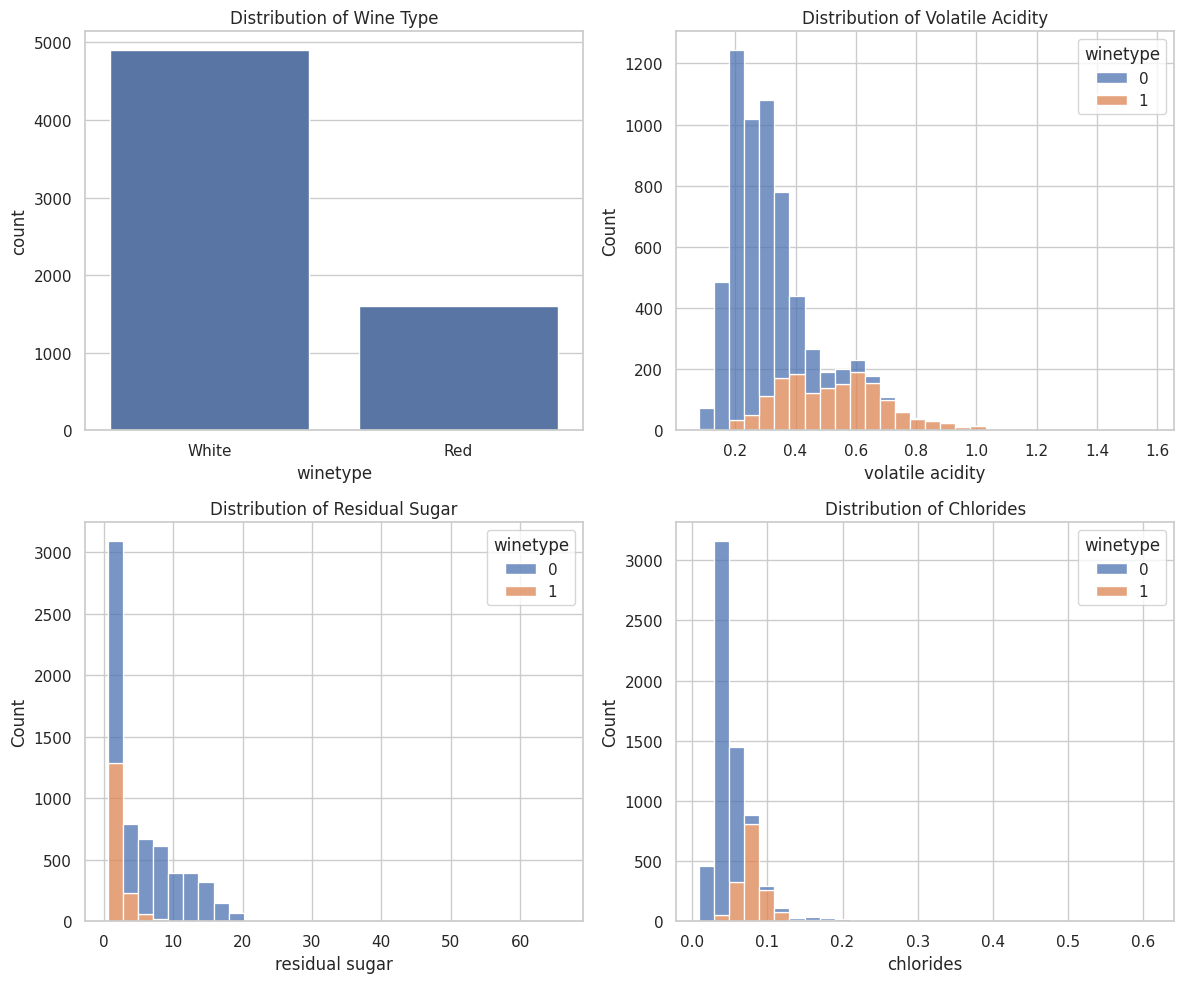

In [ ]:
explanatory_vars = ['volatile acidity', 'residual sugar', 'chlorides']


# Set the visual style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot for winetype
sns.countplot(x='winetype', data=df_combined, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Wine Type')
axes[0, 0].set_xticklabels(['White', 'Red'])

# Plot for Volatile Acidity
sns.histplot(df_combined, x='volatile acidity', hue='winetype', multiple="stack", ax=axes[0, 1], bins=30)
axes[0, 1].set_title('Distribution of Volatile Acidity')

# Plot for Residual Sugar
sns.histplot(df_combined, x='residual sugar', hue='winetype', multiple="stack", ax=axes[1, 0], bins=30)
axes[1, 0].set_title('Distribution of Residual Sugar')

# Plot for Chlorides
sns.histplot(df_combined, x='chlorides', hue='winetype', multiple="stack", ax=axes[1, 1], bins=30)
axes[1, 1].set_title('Distribution of Chlorides')

# Adjust layout
plt.tight_layout()
plt.show()

###4. Split data into training and test sets. Build models that evaluate the relationship between all available quantitative X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN (for classification) using cross-validation. How different are the results?

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.neighbors import KNeighborsClassifier

# Define features (X) and target (y)
X = df_combined.drop(columns='winetype')  # All features
y = df_combined['winetype']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(penalty=None, max_iter=1000),
    "Penalized Logistic Regression": RidgeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Evaluate models
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Print coefficients for logistic regression
    if name == "Logistic Regression":
        print("logreg.coef_: {}".format(model.coef_))

    # Training and test set scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{name} Training Set Score: {train_score:.3f}")
    print(f"{name} Test Set Score: {test_score:.3f}")

    # Predictions for the test set
    predicted_vals = model.predict(X_test)
    print(f"{name} Predictions: {predicted_vals}\n")

# Optional: Cross-validation
kfold = KFold(n_splits=5)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold)
    print(f"{name} KFold CV Mean Score: {np.mean(cv_scores):.3f}")

    cv_scores = cross_val_score(model, X_train, y_train, cv=rkf)
    print(f"{name} RepeatedKFold CV Mean Score: {np.mean(cv_scores):.3f}")

logreg.coef_: [[ 1.46865242e+00  1.23718215e+01 -1.24427538e+00 -9.09939451e-02
   3.11533417e+01  6.35275689e-02 -7.04352086e-02 -2.03979444e+01
   9.32847060e+00  8.70927046e+00 -4.24693425e-01  8.13855586e-03]]
Logistic Regression Training Set Score: 0.989
Logistic Regression Test Set Score: 0.987
Logistic Regression Predictions: [0 0 0 ... 0 0 1]

Penalized Logistic Regression Training Set Score: 0.986
Penalized Logistic Regression Test Set Score: 0.983
Penalized Logistic Regression Predictions: [0 0 0 ... 0 0 1]

KNN Training Set Score: 0.958
KNN Test Set Score: 0.936
KNN Predictions: [0 0 0 ... 0 0 0]



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression KFold CV Mean Score: 0.988


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression performed the best among the three models, achieving a high accuracy close to 99%. Penalized Logistic Regression also performed very well but slightly lower than the standard Logistic Regression
KNN had the lowest performance among the models, with accuracy around 94%. This could be due to the KNN algorithm's sensitivity to the choice of neighbors and the need for proper feature scaling.

###5. Try running your models from the previous question with and without StandardScaler. Does using StandardScaler help?

In [98]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(penalty=None, max_iter=1000),
    "Penalized Logistic Regression (Ridge)": RidgeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Evaluate models
for name, model in models.items():
    # Fit the model on scaled data
    model.fit(X_train_scaled, y_train)

    # Print coefficients for logistic regression
    if name == "Logistic Regression":
        print("logreg.coef_: {}".format(model.coef_))

    # Training and test set scores
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} Training Set Score: {train_score:.3f}")
    print(f"{name} Test Set Score: {test_score:.3f}")

    # Predictions for the test set
    predicted_vals = model.predict(X_test_scaled)
    print(f"{name} Predictions: {predicted_vals}\n")

# Optional: Cross-validation
kfold = KFold(n_splits=5)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold)
    print(f"{name} KFold CV Mean Score: {np.mean(cv_scores):.3f}")

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=rkf)
    print(f"{name} RepeatedKFold CV Mean Score: {np.mean(cv_scores):.3f}")

logreg.coef_: [[-0.35632041  1.16943499 -0.47646879 -5.67666388  0.77147935  1.44234943
  -3.34200522  5.6955535  -0.26476528  0.45328976  2.29021465  0.18139271]]
Logistic Regression Training Set Score: 0.994
Logistic Regression Test Set Score: 0.993
Logistic Regression Predictions: [0 0 0 ... 0 0 1]

Penalized Logistic Regression (Ridge) Training Set Score: 0.995
Penalized Logistic Regression (Ridge) Test Set Score: 0.995
Penalized Logistic Regression (Ridge) Predictions: [0 0 0 ... 0 0 1]

KNN Training Set Score: 0.995
KNN Test Set Score: 0.991
KNN Predictions: [0 0 0 ... 0 0 1]

Logistic Regression KFold CV Mean Score: 0.993
Logistic Regression RepeatedKFold CV Mean Score: 0.993
Penalized Logistic Regression (Ridge) KFold CV Mean Score: 0.995
Penalized Logistic Regression (Ridge) RepeatedKFold CV Mean Score: 0.995
KNN KFold CV Mean Score: 0.993
KNN RepeatedKFold CV Mean Score: 0.993


The results indicate that using StandardScaler led to improved model performance for all three models. This is especially noticeable for KNN, where performance drastically improved.

###6. Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [99]:
# Define features (X) and target (y)
X = df_combined.drop(columns='winetype')  # All features
y = df_combined['winetype']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define parameter grids
knn_param_grid = {'n_neighbors': np.arange(1, 15, 2)}
ridge_param_grid = {'alpha': np.logspace(-3, 3, 7)}
logreg_param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l2'], 'max_iter': [100, 200, 300]}

# Initialize GridSearchCV for KNN
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_param_grid, cv=10)
knn_grid.fit(X_train_scaled, y_train)

print("KNN Best Mean Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("KNN Best Parameters: {}".format(knn_grid.best_params_))
print("KNN Test Set Score: {:.3f}".format(knn_grid.score(X_test_scaled, y_test)))

# Initialize GridSearchCV for Ridge
ridge_grid = GridSearchCV(RidgeClassifier(), param_grid=ridge_param_grid, cv=10)
ridge_grid.fit(X_train_scaled, y_train)

print("\nRidge Best Mean Cross-Validation Score: {:.3f}".format(ridge_grid.best_score_))
print("Ridge Best Parameters: {}".format(ridge_grid.best_params_))
print("Ridge Test Set Score: {:.3f}".format(ridge_grid.score(X_test_scaled, y_test)))

# Initialize GridSearchCV for Logistic Regression
logreg_grid = GridSearchCV(LogisticRegression(), param_grid=logreg_param_grid, cv=10)
logreg_grid.fit(X_train_scaled, y_train)

print("\nLogistic Regression Best Mean Cross-Validation Score: {:.3f}".format(logreg_grid.best_score_))
print("Logistic Regression Best Parameters: {}".format(logreg_grid.best_params_))
print("Logistic Regression Test Set Score: {:.3f}".format(logreg_grid.score(X_test_scaled, y_test)))



KNN Best Mean Cross-Validation Score: 0.994
KNN Best Parameters: {'n_neighbors': 3}
KNN Test Set Score: 0.993

Ridge Best Mean Cross-Validation Score: 0.995
Ridge Best Parameters: {'alpha': 10.0}
Ridge Test Set Score: 0.995

Logistic Regression Best Mean Cross-Validation Score: 0.994
Logistic Regression Best Parameters: {'C': 1000.0, 'max_iter': 100, 'penalty': 'l2'}
Logistic Regression Test Set Score: 0.993


Do the results improve?: Yes, the results indicate an improvement, particularly in the Ridge Classifier, where you achieved a high mean cross-validation score of 0.995 and a test set score of 0.995

### 7. Compare the coefficients for Logistic Regression and Penalized Logistic Regression. Do they agree on which features are important

In [100]:
# Fit Logistic Regression
logreg = LogisticRegression(C=1000.0, max_iter=100, penalty='l2')
logreg.fit(X_train_scaled, y_train)

# Fit Penalized Logistic Regression (Ridge)
ridge = RidgeClassifier(alpha=10.0)
ridge.fit(X_train_scaled, y_train)

# Extract coefficients
logreg_coefficients = logreg.coef_[0]  # Get the coefficients for the Logistic Regression
ridge_coefficients = ridge.coef_[0]     # Get the coefficients for the Ridge Classifier

# Create a DataFrame to compare coefficients
coefficients_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Logistic Regression Coefficients': logreg_coefficients,
    'Ridge Coefficients': ridge_coefficients
})

# Sort by the absolute value of the coefficients
coefficients_comparison['Logistic Regression Abs'] = coefficients_comparison['Logistic Regression Coefficients'].abs()
coefficients_comparison['Ridge Abs'] = coefficients_comparison['Ridge Coefficients'].abs()
coefficients_comparison = coefficients_comparison.sort_values(by=['Logistic Regression Abs', 'Ridge Abs'], ascending=False)

# Print the comparison
print(coefficients_comparison[['Feature', 'Logistic Regression Coefficients', 'Ridge Coefficients']])

                 Feature  Logistic Regression Coefficients  Ridge Coefficients
7                density                          5.689948            0.744160
3         residual sugar                         -5.671100           -0.464272
6   total sulfur dioxide                         -3.340873           -0.343063
10               alcohol                          2.287387            0.245399
5    free sulfur dioxide                          1.441222            0.103947
1       volatile acidity                          1.169656            0.163952
4              chlorides                          0.771465            0.058705
2            citric acid                         -0.476174           -0.040131
9              sulphates                          0.453670            0.045507
0          fixed acidity                         -0.354588           -0.091193
8                     pH                         -0.263334           -0.035426
11               quality                          0.

Both models recognize **density** and **residual sugar** as important features, but the Logistic Regression model assigns much higher significance to these features compared to Ridge.

###8. Discuss which final model you would choose to predict new data

If performance is my top priority when choosing the final model, I would select Logistic Regression, particularly if it demonstrates strong results in cross-validation and testing.